In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
playersDirectory = "League/Players/"
playersFolders = os.listdir("League/Players")
teamsDirectory = "League/Teams/"
teamsFolders = os.listdir("League/Teams")

In [3]:
def removeUnamed(df):
    columnList = df.columns.tolist()
    newColumnList = columnList.copy()
    i = 0
    while i<len(newColumnList):
        if "Unnamed" in newColumnList[i]:
            stats = newColumnList[i-1].split(" / ")
            newColumnList[i-1] = stats[0]
            newColumnList[i] = " ".join(stats)
            newColumnList[i+1] = " ".join(stats) + " percentage"
            
        if "Losses" in newColumnList[i] or "Recoveries" in newColumnList[i]:
            stats = newColumnList[i].split(" / ")
            newColumnList[i] = stats[0]
            newColumnList[i+1] = stats[0] + " "+stats[1]
            newColumnList[i+2] = stats[0] + " "+stats[2]
            newColumnList[i+3] = stats[0] + " "+stats[3]
            i+=3
        i+=1
    columnsRenamed = dict(zip(columnList,newColumnList))
    df = df.rename(columns=columnsRenamed)
    return df
def removePercents(df):
    columns = df.columns.tolist()
    for i in range(len(columns)):
        if "percent" in columns[i]:
            df.drop(columns[i],axis=1,inplace=True)
    return df

In [4]:
teams = dict()
for team in teamsFolders:
    df =pd.read_excel(teamsDirectory+team)
    df = df.iloc[2:]
    df = removeUnamed(df)
    df = removePercents(df)
    teams[team] = df
merged = teams[teamsFolders[0]]
for team in teamsFolders:
    df = teams[team]
    merged = pd.merge(merged, df, how='outer')
merged = merged.assign(Season = merged.get("Date").apply(lambda date: int(date.split("-")[0])))
merged = merged[merged.get("Season")==2024]

columns = merged.columns.tolist()
gameData = pd.DataFrame(merged.to_numpy(),columns=columns)
allTeamsSeasonSums=merged.drop(["Date","Scheme","Match","Competition"],axis = 1).groupby(["Team", "Season"]).sum()

In [5]:
for df in [merged,gameData,allTeamsSeasonSums]:
    
    #inserting percentages
    df.insert(22, "Crossing accuracy",df.get("Crosses accurate")/df.get("Crosses") )
    df.insert(9, "Shots on target accuracy",df.get("Shots on target")/df.get("Shots") )
    df.insert(78, "Throw in percentage",df.get("Throw ins accurate")/df.get("Throw ins") )
    df.insert(74, "Progressive passes accuracy",df.get("Progressive passes accurate")/df.get("Progressive passes") )
    df.insert(72, "Passes to final third accuracy",df.get("Passes to final third accurate")/df.get("Passes to final third") )
    df.insert(70, "Long passes accuracy",df.get("Long passes accurate")/df.get("Long passes") )
    df.insert(68, "Lateral passes accuracy",df.get("Lateral passes accurate")/df.get("Lateral passes") )
    df.insert(66, "Back passes accuracy",df.get("Back passes accurate")/df.get("Back passes") )
    df.insert(64, "Forward passes accuracy",df.get("Forward passes accurate")/df.get("Forward passes") )
    df.insert(56, "Duels accuracy",df.get("Duels won")/df.get("Duels") )
    df.insert(45, "Passes accuracy",df.get("Passes accurate")/df.get("Passes") )
    df.insert(35, "Aerial duels accuracy",df.get("Aerial duels won")/df.get("Aerial duels") )
    df.insert(33, "Defensive duels accuracy",df.get("Defensive duels won")/df.get("Defensive duels") )
    df.insert(31, "Shots against on target accuracy",df.get("Shots against on target")/df.get("Shots against") )
    df.insert(26, "Offensive duels accuracy",df.get("Offensive duels won")/df.get("Offensive duels") )
    df.insert(16, "Positional attacks with shots percentage",df.get("Positional attacks with shots")/df.get("Positional attacks") )
    df.insert(64, "Forward passes percentage",df.get("Forward passes accurate")/df.get("Passes accurate") )
    df.insert(64, "Back passes percentage",df.get("Back passes accurate")/df.get("Passes accurate") )
    df.insert(64, "Lateral passes percentage",df.get("Lateral passes accurate")/df.get("Passes accurate") )
    df.insert(64, "Passes to final third percentage",df.get("Passes to final third accurate")/df.get("Passes accurate") )
    df.insert(64, "Progressive passes percentage",df.get("Progressive passes accurate")/df.get("Passes accurate") )
    df.insert(64, "Long passes percentage",df.get("Long passes accurate")/df.get("Passes accurate") )
    #df.insert(64, "Total actions accuracy", df.get("Total actions successful")/df.get("Total actions"))
    #inserting custom stats
    df.insert(7, "Difference in Goals and xG",df.get("Goals")-df.get("xG") )
    df.insert(8, "Goal differential", df.get("Goals")-df.get("Conceded goals"))
    df["Dangerous Passes"] = df["Deep completed crosses"]+df["Deep completed passes"]
    df["Passes per Loss"] = df["Passes"]/df["Losses"]

In [6]:
percantagesColumns =[column for column in allTeamsSeasonSums.columns.tolist() if ("accuracy" in column) or ("percentage" in column)] + ["Difference in Goals and xG"]
allSeasonPercentages = allTeamsSeasonSums.get(percantagesColumns).reset_index()
allSeasonAverages = merged.drop(["Date","Scheme","Match","Competition"]+percantagesColumns,axis = 1).groupby(["Team","Season"]).mean().reset_index()
allSeasonStats = pd.merge(allSeasonAverages,allSeasonPercentages,on = ["Season","Team"])
allSeasonStats = allSeasonStats[allSeasonStats.get("Season")==2024]
allSeasonStats = allSeasonStats[allSeasonStats.get("Team").apply(lambda team: team in ['CSU Bakersfield Roadrunners',
 'UC Davis Aggies',
 'Cal Poly Mustangs',
 'Cal State Fullerton Titans',
 'CSUN Matadors',
 'Sacramento State Hornets',
 'UC San Diego Tritons',
 'UC Riverside Highlanders',
 'UC Irvine Anteaters',
 'UC Santa Barbara Gauchos'])]
allSeasonStats.set_index("Team",inplace=True)
allSeasonStats.insert(40,"Penalty area entries runs or crosses",allSeasonStats.get("Penalty area entries (runs"))

In [7]:
def removeUnamed(df):
    columnList = df.columns.tolist()
    newColumnList = columnList.copy()
    i = 0
    while i<len(newColumnList):
        if "Unnamed" in newColumnList[i]:
            stats = newColumnList[i-1].split(" / ")
            newColumnList[i-1] = stats[0]
            newColumnList[i] = " ".join(stats)
        i+=1
    columnsRenamed = dict(zip(columnList,newColumnList))
    df = df.rename(columns=columnsRenamed)
    return df

In [8]:
teamsDFs = dict()
for team in playersFolders:
    players = os.listdir(playersDirectory+team)
    teamDf = pd.read_excel(playersDirectory+team+'/'+players[0])
    teamDf = removeUnamed(teamDf)
    teamDf = teamDf.assign(Player = " ".join(players[0].split(" ")[2:]).replace(".xlsx",""))
    for player in players:
        df = pd.read_excel(playersDirectory+team+'/'+player)
        df = removeUnamed(df)
        df = df.assign(Player = " ".join(player.split(" ")[2:]).replace(".xlsx",""))
        teamDf = pd.concat([teamDf,df])
    teamDf.insert(0,"Team",team)
    teamsDFs[team] = teamDf
merged = teamsDFs[playersFolders[0]]
for team in playersFolders:
    merged = pd.concat([merged,teamsDFs[team]])
merged = merged.assign(Season = merged.get("Date").apply(lambda date: int(date.split("-")[0])))
merged = merged[merged.get("Season")==2024]
merged.drop_duplicates(inplace=True)
positions = merged[merged.get("Position").apply(lambda position: type(position)!=int)]
positions = positions.groupby("Player")["Position"].agg(pd.Series.mode).to_frame()
positionsDict = {}
for player, position in positions.reset_index().to_numpy():
    if type(position) ==str:
        if "GK" == position:
            positionsDict[player]="Goalkeeper"
        elif "M" in position:
            positionsDict[player] = "Midfield"
        elif "F" in position or "W" in position:
            positionsDict[player]="Forward"
        else:
            positionsDict[player] = "Defense"
    else:
        forwardCount=0
        midfieldCount=0
        defenseCount=0
        for pos in position:
            
            if "M" in pos:
                midfieldCount +=1
            elif "F" in pos or "W" in pos:
                forwardCount +=1 
            else:
                defenseCount +=1
        if forwardCount>midfieldCount and forwardCount>defenseCount:
            positionsDict[player]="Forward"
        elif midfieldCount>defenseCount:
            positionsDict[player] = "Midfield"
        else:
            positionsDict[player] = "Defense"
merged = merged[merged.get("Player").apply(lambda player: player in positionsDict.keys())]
merged = merged.assign(Position = merged.get("Player").apply(lambda player: positionsDict[player]))
teamsByPositionGame = merged.drop(["Competition","Date","Player","Season"],axis = 1).groupby(["Team","Position","Match"]).sum().reset_index()
teamsByPosition = teamsByPositionGame.drop("Match",axis=1).groupby(["Team","Position"]).sum()
playerSum = merged.drop(["Match","Competition","Date","Position","Team"],axis = 1).groupby("Player").sum().reset_index()
playerSum = playerSum.assign(GamesPlayed = playerSum.get("Season").apply(lambda season: int(season/2024)))
playerSum = playerSum.assign(Team = playerSum.get("Player").apply(lambda player: merged[merged.get("Player")==player].get("Team").unique()[0]))
playerSum = playerSum.assign(MinutesPlayedSum = playerSum.get("Minutes played"))
playerGameData = merged.copy()
dfs = [playerSum, playerGameData,teamsByPositionGame,teamsByPosition]
for df in dfs:
    df.insert(6,"Shot accuracy",df.get("Shots on target")/df.get("Shots"))
    df.insert(6,"Pass accuracy",df.get("Passes accurate")/df.get("Passes"))
    df.insert(6,"Long pass accuracy",df.get("Long passes accurate")/df.get("Long passes"))
    df.insert(6,"Crosses accuracy",df.get("Crosses accurate")/df.get("Crosses"))
    df.insert(6,"Dribbles accuracy",df.get("Dribbles successful")/df.get("Dribbles"))
    df.insert(6,"Duels accuracy",df.get("Duels won")/df.get("Duels"))
    df.insert(6,"Aerial duels accuracy",df.get("Aerial duels won")/df.get("Aerial duels"))
    df.insert(6,"Defensive duels accuracy",df.get("Defensive duels won")/df.get("Defensive duels"))
    df.insert(6,"Loose ball duels accuracy",df.get("Loose ball duels won")/df.get("Loose ball duels"))
    df.insert(6,"Sliding tackles accuracy",df.get("Sliding tackles successful")/df.get("Sliding tackles"))
    df.insert(6,"Offensive duels accuracy",df.get("Offensive duels won")/df.get("Offensive duels"))
    df.insert(6,"Through pass accuracy",df.get("Through passes accurate")/df.get("Through passes"))
    df.insert(6,"Passes to final third accuracy",df.get("Passes to final third accurate")/df.get("Passes to final third"))
    df.insert(6,"Passes to penalty area accuracy",df.get("Passes to penalty area accurate")/df.get("Passes to penalty area"))
    df.insert(6,"Forward passes accuracy",df.get("Forward passes accurate")/df.get("Forward passes"))
    df.insert(6,"Back passes accuracy",df.get("Back passes accurate")/df.get("Back passes"))
    df.insert(6, "Forward passes percentage",df.get("Forward passes")/df.get("Passes") )
    df.insert(6, "Back passes percentage",df.get("Back passes")/df.get("Passes") )
    df.insert(6, "Passes to final third percentage",df.get("Passes to final third")/df.get("Passes") )
    df.insert(6, "Long passes percentage",df.get("Long passes")/df.get("Passes") )
    df.insert(64, "Total actions accuracy", df.get("Total actions successful")/df.get("Total actions"))
    df.insert(7, "Difference in Goals and xG",df.get("Goals")-df.get("xG") )
    df.insert(7, "Touches per minute",df.get("Total actions")/df.get("Minutes played"))

In [9]:
percantagesColumns =[column for column in teamsByPosition.columns.tolist() if ("accuracy" in column) or ("percentage" in column)] + ["Difference in Goals and xG","Touches per minute"]
positionPercentages = teamsByPosition.get(percantagesColumns).reset_index()
positionAverages = teamsByPositionGame.drop(percantagesColumns+["Match"],axis=1).groupby(["Team","Position"]).mean().reset_index()
positionSeason = pd.merge(positionAverages,positionPercentages,on = ["Team","Position"])

In [10]:
percantagesColumns =[column for column in playerSum.columns.tolist() if ("accuracy" in column) or ("percentage" in column)] + ["Difference in Goals and xG"]
playerSeasonPercentages = playerSum.get(percantagesColumns+["Player","MinutesPlayedSum"]).reset_index()
playerSeasonAverages = playerGameData.drop(percantagesColumns,axis=1).drop(["Match","Date","Competition","Position","Team"],axis = 1).groupby("Player").mean().reset_index()
playerSeason = pd.merge(playerSeasonAverages,playerSeasonPercentages,on = "Player")
playerSeason = playerSeason.assign(Team = playerSeason.get("Player").apply(lambda player: merged[merged.get("Player")==player].get("Team").unique()[0]))

In [11]:
playerSeason = playerSeason[playerSeason.get("Player").apply(lambda player: player in positionsDict.keys())]
playerSeason = playerSeason.assign(Position = playerSeason.get("Player").apply(lambda player: positionsDict[player]))
playerGameData = playerGameData[playerGameData.get("Player").apply(lambda player: player in positionsDict.keys())]
playerGameData = playerGameData.drop("Position",axis=1).assign(Position = playerSeason.get("Player").apply(lambda player: positionsDict[player]))

In [12]:
playerSeason.set_index("Player",inplace=True)

In [13]:
playerSeason = playerSeason[playerSeason.get("MinutesPlayedSum")>=400]
attackingPlayers = playerSeason[playerSeason.get("Position")=="Forward"]
midfieldPlayers = playerSeason[playerSeason.get("Position")=="Midfield"]
defendingPlayers = playerSeason[playerSeason.get("Position")=="Defense"]
ucsdPlayerSeason = playerSeason[playerSeason.get("Team")=="UCSD"]

C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\1803201507.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsdPlayerSeason.shape[0])
C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\1803201507.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsdPlayerSeason.shape[0])
C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\1803201507.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_

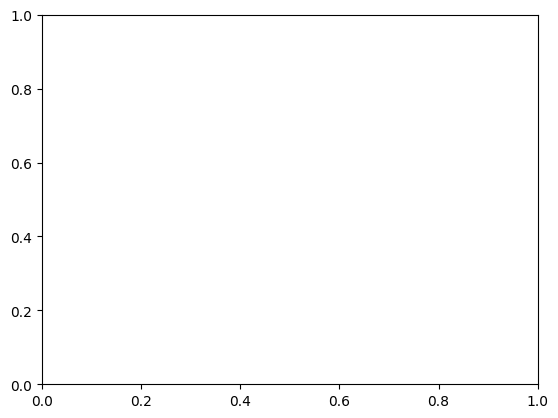

In [14]:
stats = ["Forward passes accuracy","Pass accuracy","Offensive duels accuracy","Defensive duels accuracy","Total actions accuracy","Touches per minute"]
for stat in stats:

    playerSeason.get(stat).hist()
    sorted = playerSeason.sort_values(stat, ascending=False)
    ucsdPlayerSeason = ucsdPlayerSeason.sort_values(stat,ascending=False)
    colors = plt.cm.get_cmap('magma', ucsdPlayerSeason.shape[0])
    # Assign colors to names
    ucsdPlayerColorsDict = {name: colors(i) for i, name in enumerate(ucsdPlayerSeason.index)}

    for i in range(ucsdPlayerSeason.shape[0]):
        row = ucsdPlayerSeason.iloc[i]
        player = row.name
        val = row.get(stat)
        percentage = round(sorted.get([stat]).index.get_loc(player)/playerSeason.shape[0],2)
        plt.axvline(val,label = player+": "+str(percentage),color = ucsdPlayerColorsDict[player])
    plt.legend()
    plt.title(stat+" in Big West")
    plt.plot()
    plt.savefig("League/Histograms/AllPlayers/"+stat)
    plt.cla()

C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\584387169.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsd.shape[0])
C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\584387169.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsd.shape[0])
C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\584387169.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsd.shape[0]

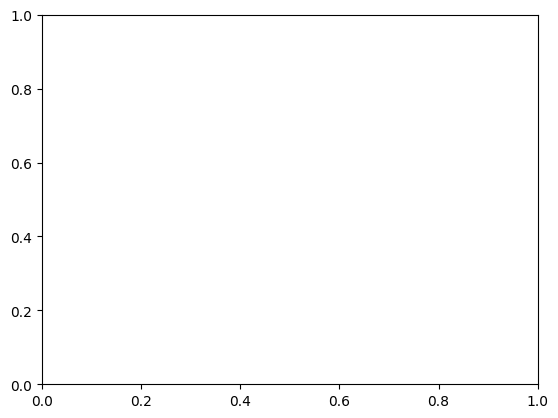

In [15]:
AttackingStats = ["Pass accuracy","Offensive duels accuracy","Defensive duels accuracy","Total actions accuracy","Shots on target","Shot accuracy","Losses","Touches in penalty area","Difference in Goals and xG","Touches per minute","Offensive duels"]

for stat in AttackingStats:
    attackingPlayers.get(stat).hist()
    sorted = attackingPlayers.sort_values(stat, ascending=False)
    ucsd = attackingPlayers[attackingPlayers.get("Team")=="UCSD"]
    ucsd = ucsd.sort_values(stat,ascending=False)
    colors = plt.cm.get_cmap('magma', ucsd.shape[0])
    # Assign colors to names
    ucsdPlayerColorsDict = {name: colors(i) for i, name in enumerate(ucsd.index)}

    for i in range(ucsd.shape[0]):
        row = ucsd.iloc[i]
        player = row.name
        val = row.get(stat)
        percentage = round(sorted.get([stat]).index.get_loc(player)/attackingPlayers.shape[0],2)
        plt.axvline(val,label = player+": "+str(percentage),color = ucsdPlayerColorsDict[player])
    plt.legend()
    plt.title(stat+" in Big West")
    plt.plot()
    plt.savefig("League/Histograms/Attacking/"+stat)
    plt.cla()

Pass accuracy
Defensive duels accuracy
Aerial duels accuracy


C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\961330447.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsd.shape[0])
C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\961330447.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsd.shape[0])
C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\961330447.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsd.shape[0]

Total actions accuracy
Long pass accuracy
Long passes percentage


C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\961330447.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsd.shape[0])
C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\961330447.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsd.shape[0])
C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\961330447.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsd.shape[0]

Touches per minute
Losses


C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\961330447.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsd.shape[0])
C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\961330447.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsd.shape[0])


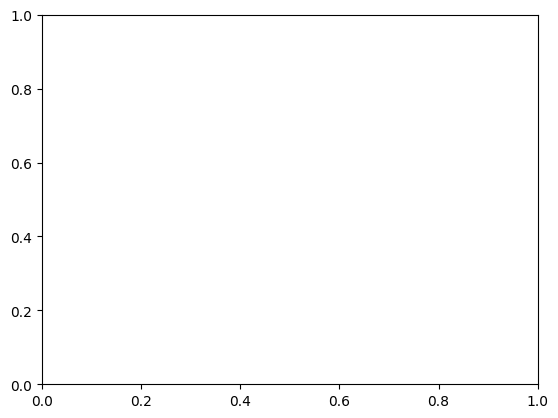

In [16]:
DefendingStats = ["Pass accuracy","Defensive duels accuracy","Aerial duels accuracy","Total actions accuracy","Long pass accuracy","Long passes percentage","Touches per minute","Losses"]

for stat in DefendingStats:
    print(stat)
    defendingPlayers.get(stat).hist()
    sorted = defendingPlayers.sort_values(stat, ascending=False)
    ucsd = defendingPlayers[defendingPlayers.get("Team")=="UCSD"]
    ucsd = ucsd.sort_values(stat,ascending=False)
    colors = plt.cm.get_cmap('magma', ucsd.shape[0])
    # Assign colors to names
    ucsdPlayerColorsDict = {name: colors(i) for i, name in enumerate(ucsd.index)}

    for i in range(ucsd.shape[0]):
        row = ucsd.iloc[i]
        player = row.name
        val = row.get(stat)
        percentage = round(sorted.get([stat]).index.get_loc(player)/defendingPlayers.shape[0],2)
        plt.axvline(val,label = player+": "+str(percentage),color = ucsdPlayerColorsDict[player])
    plt.legend()
    plt.title(stat+" in Big West")
    plt.plot()
    plt.savefig("League/Histograms/Defending/"+stat)
    plt.cla()

In [34]:
defendingPlayers[["Defensive duels accuracy"]].sort_values("Defensive duels accuracy", ascending=False)

,Defensive duels accuracy
Player,
A. Kamienski,0.813084
K. Braun (1),0.809524
P. Owens,0.797468
B. Elliott,0.776119
A. Huggins,0.775362
A. Meade Tatum,0.772358
L. Geishauser,0.768293
B. Gutierrez,0.759036
J. Vom Steeg,0.753846


Pass accuracy
Defensive duels accuracy
Offensive duels accuracy


C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\3706175298.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsd.shape[0])
C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\3706175298.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsd.shape[0])
C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\3706175298.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsd.shape

Total actions accuracy
Losses
Long passes percentage


C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\3706175298.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsd.shape[0])
C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\3706175298.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsd.shape[0])
C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\3706175298.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsd.shape

Forward passes percentage
Forward passes accuracy


C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\3706175298.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsd.shape[0])
C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\3706175298.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsd.shape[0])


Passes to final third accurate
Touches per minute


C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\3706175298.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsd.shape[0])
C:\Users\zcoch\AppData\Local\Temp\ipykernel_35764\3706175298.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', ucsd.shape[0])


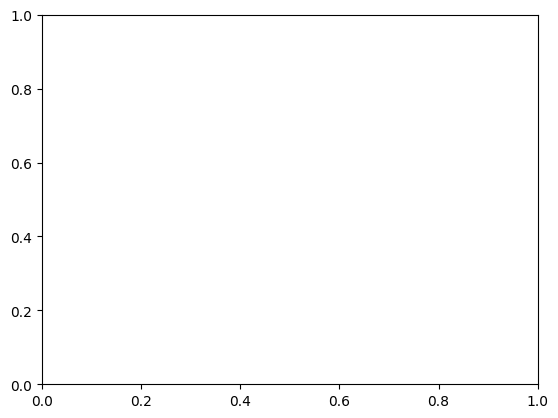

In [17]:
midfieldStats = ["Pass accuracy","Defensive duels accuracy","Offensive duels accuracy","Total actions accuracy","Losses","Long passes percentage","Forward passes percentage","Forward passes accuracy","Passes to final third accurate","Touches per minute"]

for stat in midfieldStats:
    print(stat)
    midfieldPlayers.get(stat).hist()
    sorted = midfieldPlayers.sort_values(stat, ascending=False)
    ucsd = midfieldPlayers[midfieldPlayers.get("Team")=="UCSD"]
    ucsd = ucsd.sort_values(stat,ascending=False)
    colors = plt.cm.get_cmap('magma', ucsd.shape[0])
    # Assign colors to names
    ucsdPlayerColorsDict = {name: colors(i) for i, name in enumerate(ucsd.index)}

    for i in range(ucsd.shape[0]):
        row = ucsd.iloc[i]
        player = row.name
        val = row.get(stat)
        percentage = round(sorted.get([stat]).index.get_loc(player)/midfieldPlayers.shape[0],2)
        plt.axvline(val,label = player+": "+str(percentage),color = ucsdPlayerColorsDict[player])
    plt.legend()
    plt.title(stat+" in Big West")
    plt.plot()
    plt.savefig("League/Histograms/Midfield/"+stat)
    plt.cla()


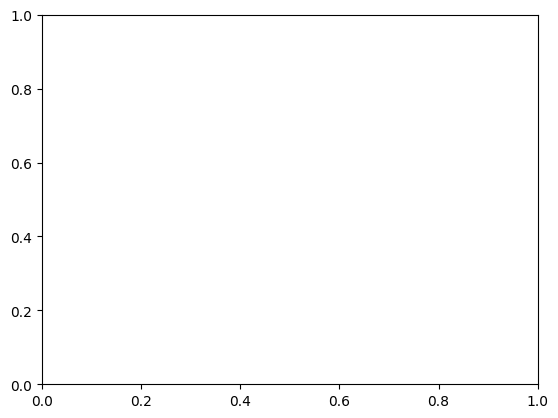

In [18]:
AttackingStats = ["Pass accuracy","Offensive duels accuracy","Defensive duels accuracy","Total actions accuracy","Shots on target","Shot accuracy","Losses","Touches in penalty area","Difference in Goals and xG","Touches per minute","Offensive duels"]

for stat in AttackingStats:
    specific = positionSeason[positionSeason.get("Position")=="Forward"]
    specific.get(stat).hist()
    sorted = specific.sort_values(stat, ascending=False)
    ucsd = specific[specific.get("Team")=="UCSD"].get(stat).iloc[0]
    plt.axvline(ucsd,label = "UCSD",color = "Red")
    plt.legend()
    plt.title(stat+" in Big West")
    plt.plot()
    plt.savefig("League/Histograms/Positions/Attacking/"+stat)
    plt.cla()

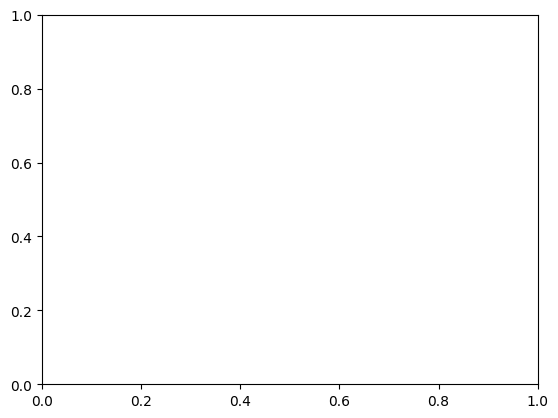

In [19]:
for stat in midfieldStats:
    specific = positionSeason[positionSeason.get("Position")=="Midfield"]
    specific.get(stat).hist()
    sorted = specific.sort_values(stat, ascending=False)
    ucsd = specific[specific.get("Team")=="UCSD"].get(stat).iloc[0]
    plt.axvline(ucsd,label = "UCSD",color = "Red")
    plt.legend()
    plt.title(stat+" in Big West")
    plt.plot()
    plt.savefig("League/Histograms/Positions/Midfield/"+stat)
    plt.cla()

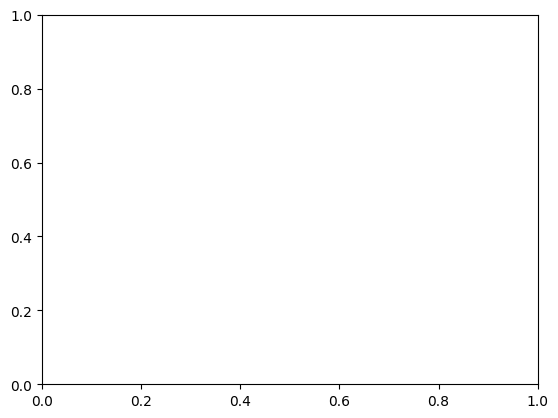

In [20]:
for stat in DefendingStats:
    specific = positionSeason[positionSeason.get("Position")=="Defense"]
    specific.get(stat).hist()
    sorted = specific.sort_values(stat, ascending=False)
    ucsd = specific[specific.get("Team")=="UCSD"].get(stat).iloc[0]
    plt.axvline(ucsd,label = "UCSD",color = "Red")
    plt.legend()
    plt.title(stat+" in Big West")
    plt.plot()
    plt.savefig("League/Histograms/Positions/Defense/"+stat)
    plt.cla()

-0.1641176470588237


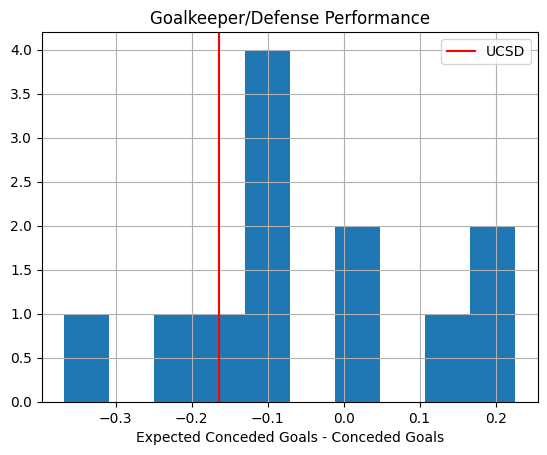

In [21]:
gks = playerSeason[playerSeason.get("Position")=="Goalkeeper"].get(["Conceded goals","xCG","Team"])
gks = gks.assign(Performance = gks.get("xCG")-gks.get("Conceded goals"))
gks.hist("Performance",bins = 10)
ucsd = gks[gks.get("Team")=="UCSD"].get("Performance").values[0]
print(ucsd)
plt.axvline(ucsd,label = "UCSD",color= "red")
plt.title("Goalkeeper/Defense Performance")
plt.xlabel("Expected Conceded Goals - Conceded Goals")
plt.legend()

<Axes: ylabel='Player'>

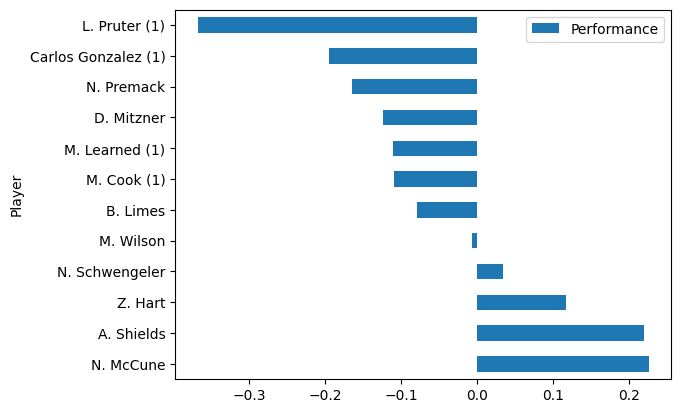

In [22]:
gks.sort_values(by="Performance",ascending=False).plot(kind="barh",y="Performance")

In [23]:
gks.groupby("Team")["Performance"].max().sort_values(ascending = False)

Team
CP           0.225789
UCI          0.220000
CSUB         0.116667
UCD          0.033750
Fullerton   -0.078333
CSUN        -0.109333
SS          -0.111176
UCSB        -0.123158
UCSD        -0.164118
UCR         -0.195333
Name: Performance, dtype: float64

In [24]:
allSeasonStats["Dangerous Passes"] = allSeasonStats["Deep completed crosses"]+allSeasonStats["Deep completed passes"]

allSeasonStats

,Season,Duration,Goals,Goal differential,xG,Shots,Shots on target,Passes,Passes accurate,"Possession, %",...,Back passes percentage,Forward passes percentage,Forward passes accuracy,Back passes accuracy,Lateral passes accuracy,Long passes accuracy,Passes to final third accuracy,Progressive passes accuracy,Throw in percentage,Difference in Goals and xG
Team,,,,,,,,,,,,,,,,,,,,,
CSU Bakersfield Roadrunners,2024,107.333333,1.466667,0.266667,1.576667,12.000000,4.800000,398.933333,316.333333,49.150000,...,0.161855,0.310432,0.698435,0.912114,0.856654,0.536685,0.628190,0.690476,0.862903,-1.65
CSUN Matadors,2024,104.823529,1.117647,-0.588235,1.260588,12.941176,4.117647,420.352941,342.411765,53.782353,...,0.154441,0.305618,0.715320,0.937435,0.864359,0.511139,0.699805,0.724336,0.889474,-2.43
Cal Poly Mustangs,2024,104.263158,1.052632,0.263158,1.095789,10.578947,3.789474,343.631579,258.315789,45.620000,...,0.183578,0.347188,0.642050,0.911943,0.819657,0.494787,0.581204,0.698074,0.826248,-0.82
Cal State Fullerton Titans,2024,106.526316,1.842105,0.210526,1.393158,13.842105,5.210526,353.842105,265.736842,46.847895,...,0.155674,0.355120,0.651526,0.912892,0.834473,0.484290,0.600768,0.679325,0.847525,8.53
Sacramento State Hornets,2024,105.823529,1.470588,-0.294118,1.073529,10.647059,4.176471,394.764706,318.176471,49.266471,...,0.178221,0.300795,0.686498,0.927815,0.878764,0.513545,0.643243,0.701878,0.827027,6.75
UC Davis Aggies,2024,106.684211,1.578947,0.315789,1.673684,12.263158,4.947368,326.157895,249.421053,48.585263,...,0.169445,0.328128,0.654461,0.926182,0.840247,0.525391,0.621225,0.747191,0.908120,-1.80
UC Irvine Anteaters,2024,103.333333,1.277778,0.055556,1.431111,11.611111,3.888889,430.666667,341.722222,49.408889,...,0.171192,0.319135,0.689498,0.928571,0.859187,0.472152,0.640805,0.638773,0.905908,-2.76
UC Riverside Highlanders,2024,104.000000,1.200000,-0.266667,1.192000,10.866667,3.800000,391.733333,312.466667,51.756667,...,0.166204,0.317474,0.689527,0.922986,0.862448,0.497942,0.593830,0.700631,0.868035,0.12
UC San Diego Tritons,2024,101.058824,1.176471,-0.470588,1.161765,9.705882,3.764706,386.470588,306.352941,46.128824,...,0.190476,0.352535,0.699429,0.916821,0.860099,0.500564,0.641133,0.689836,0.878788,0.25


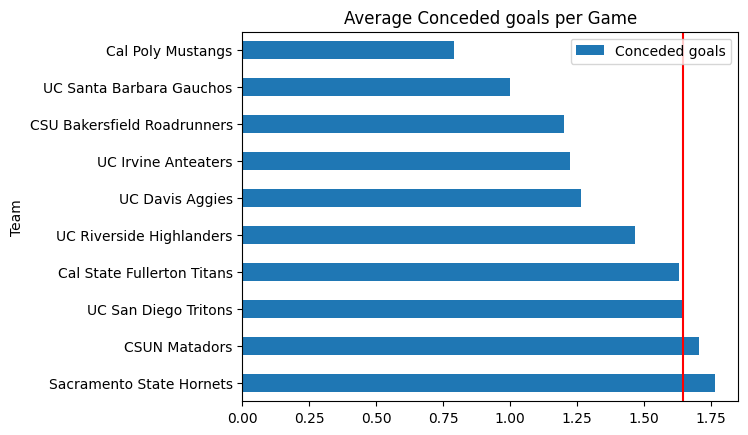

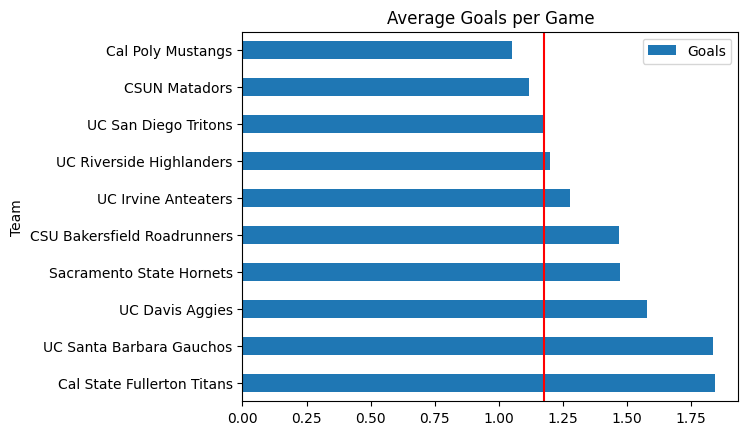

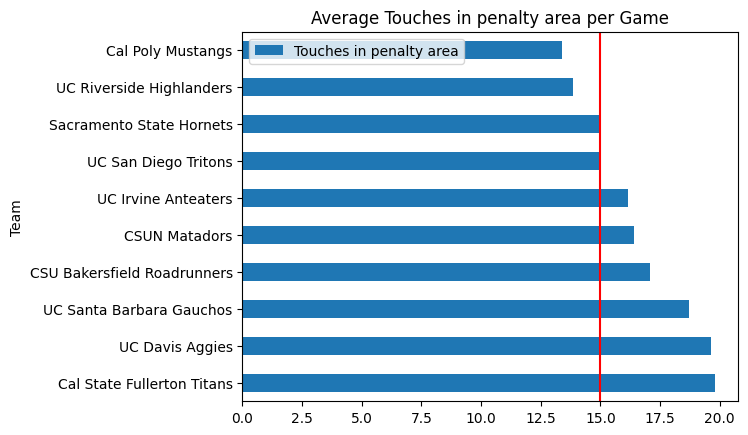

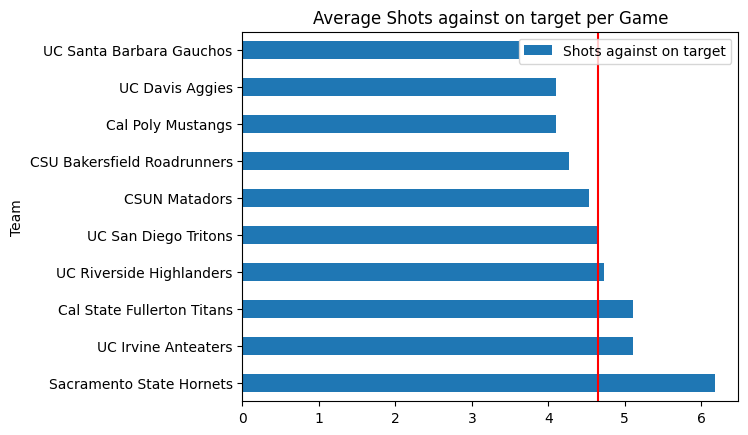

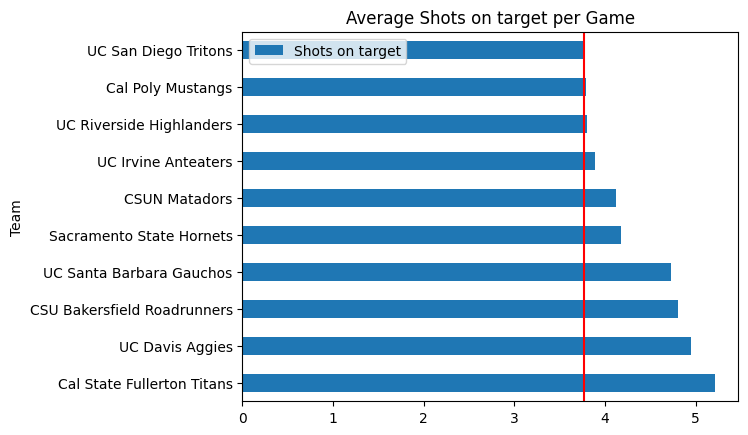

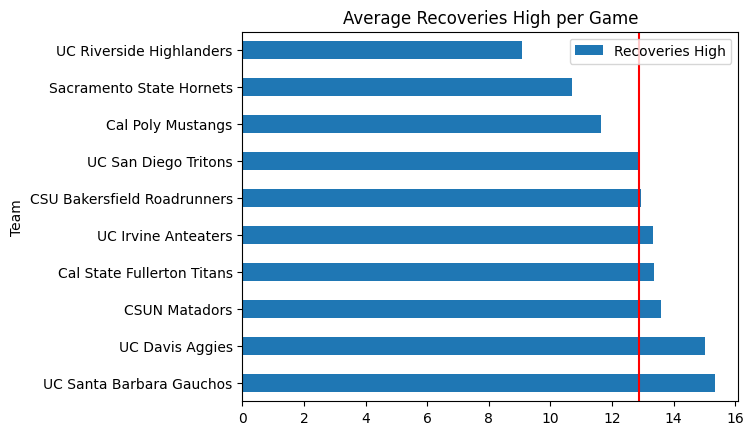

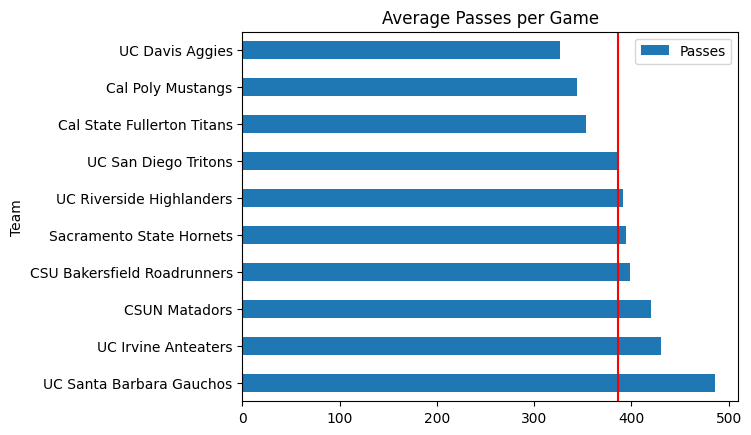

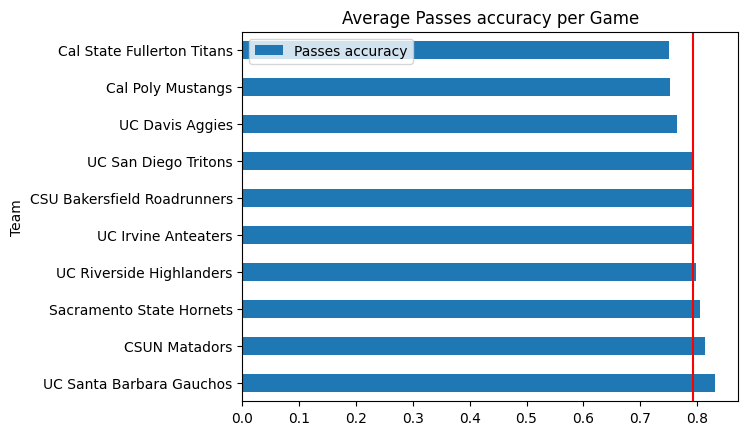

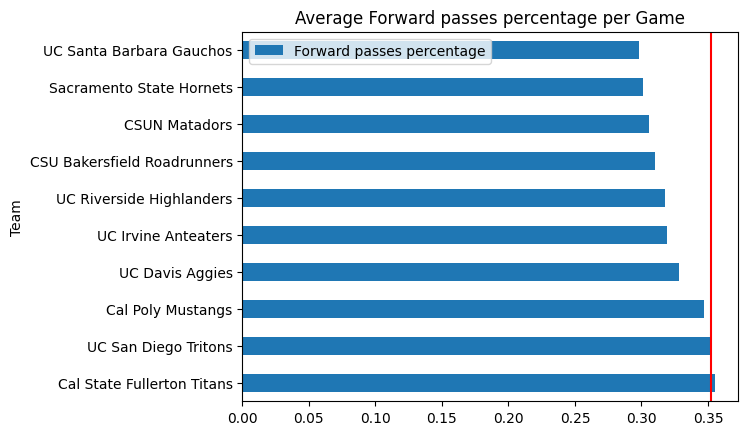

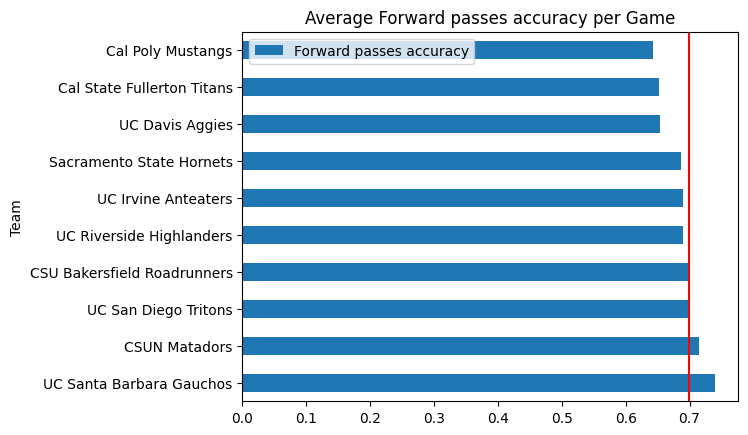

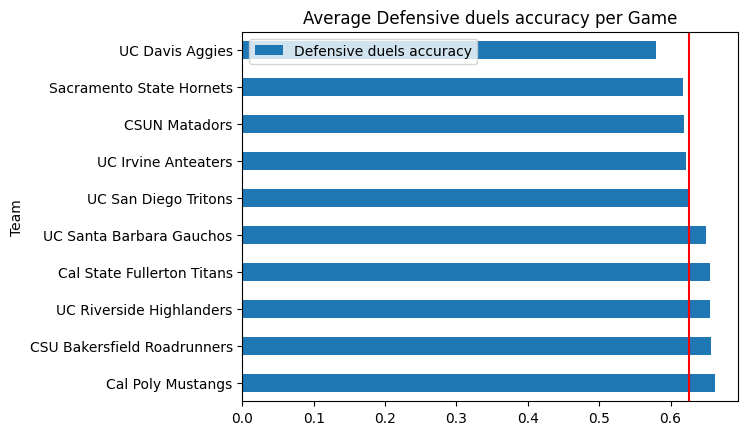

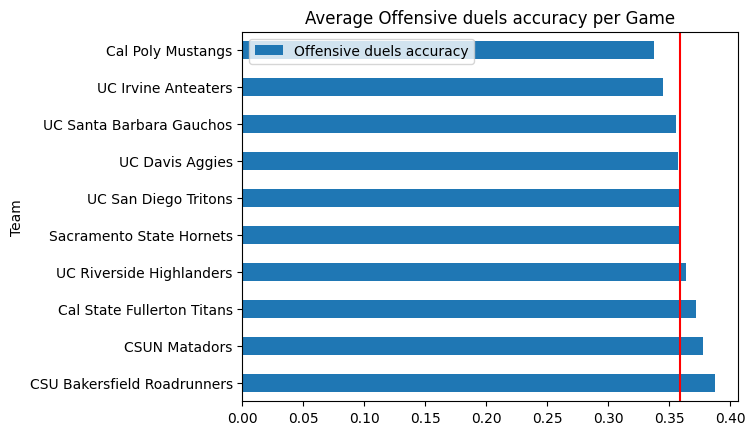

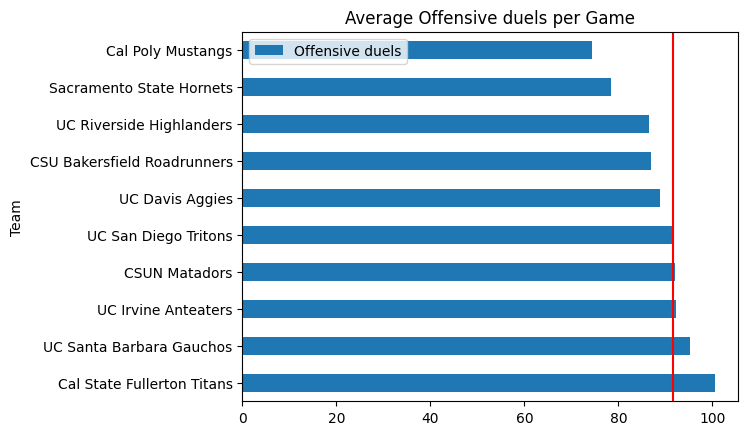

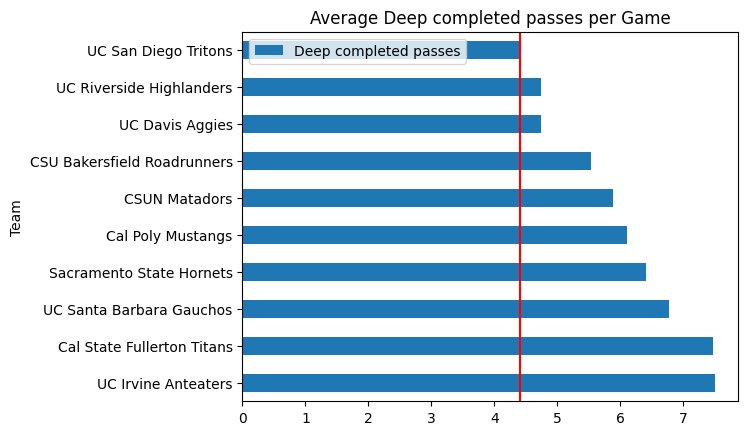

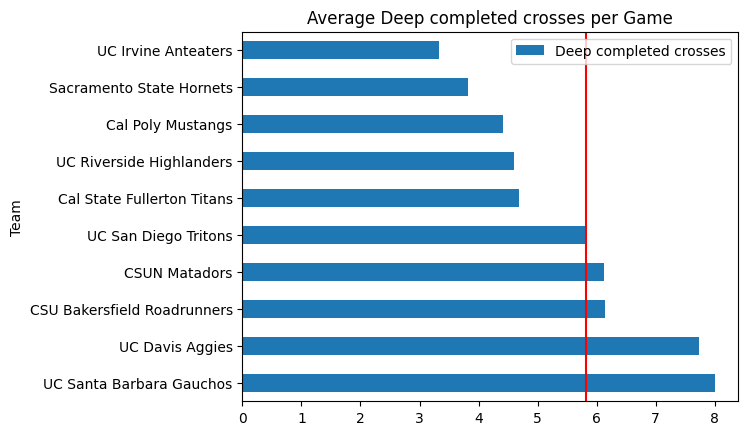

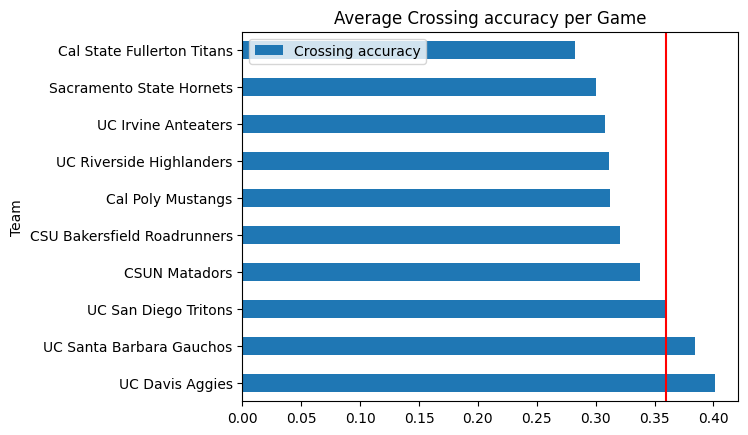

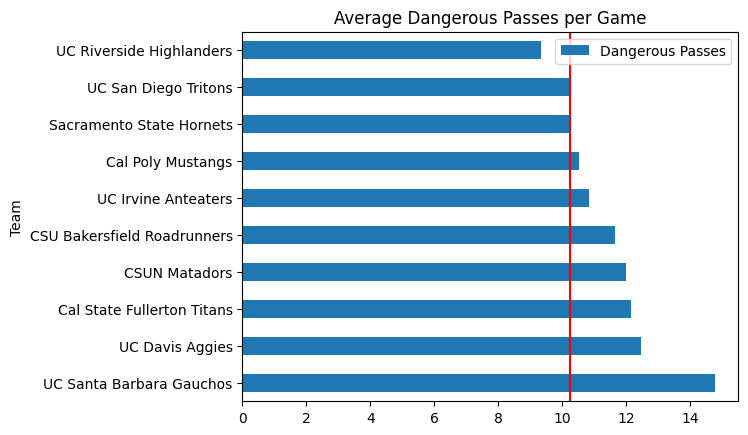

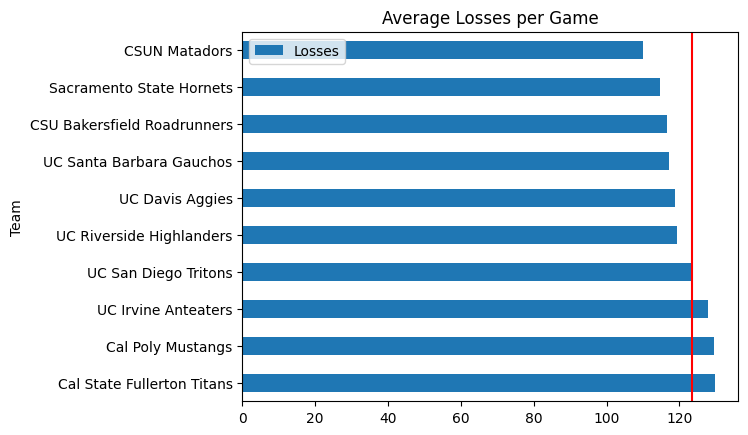

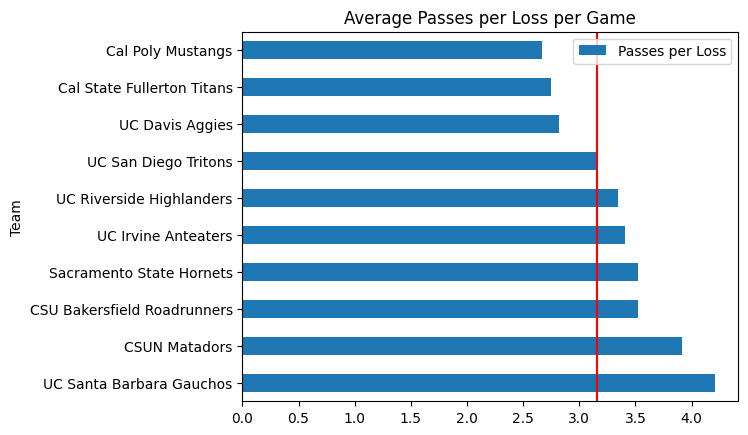

In [25]:
stats_ = ["Conceded goals","Goals","Touches in penalty area","Shots against on target","Shots on target","Recoveries High","Passes","Passes accuracy","Forward passes percentage","Forward passes accuracy","Defensive duels accuracy","Offensive duels accuracy","Offensive duels","Deep completed passes","Deep completed crosses","Crossing accuracy","Dangerous Passes","Losses","Passes per Loss"]
for stat in stats_:
    sorted = allSeasonStats.get([stat]).sort_values(stat,ascending=False)
    ucsd  = sorted.loc["UC San Diego Tritons"].values[0]
    sorted.plot(kind = "barh")
    plt.axvline(ucsd, label = "UCSD",color = "r")
    plt.title("Average {} per Game".format(stat))

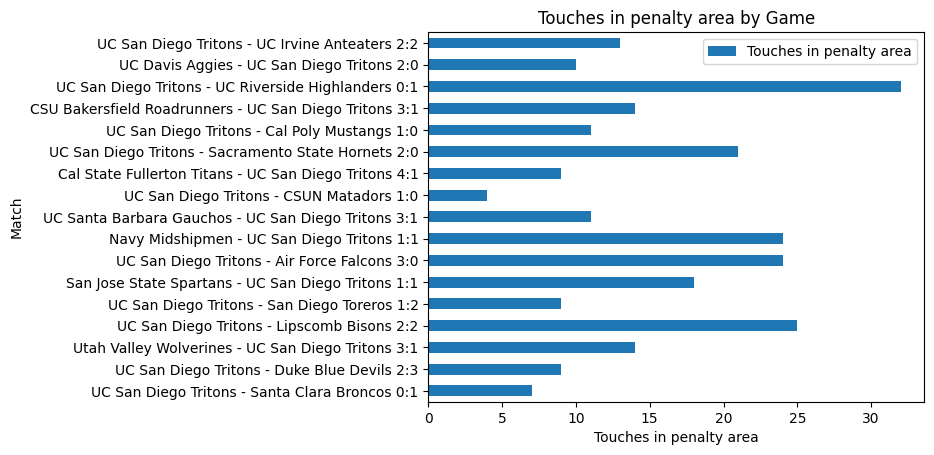

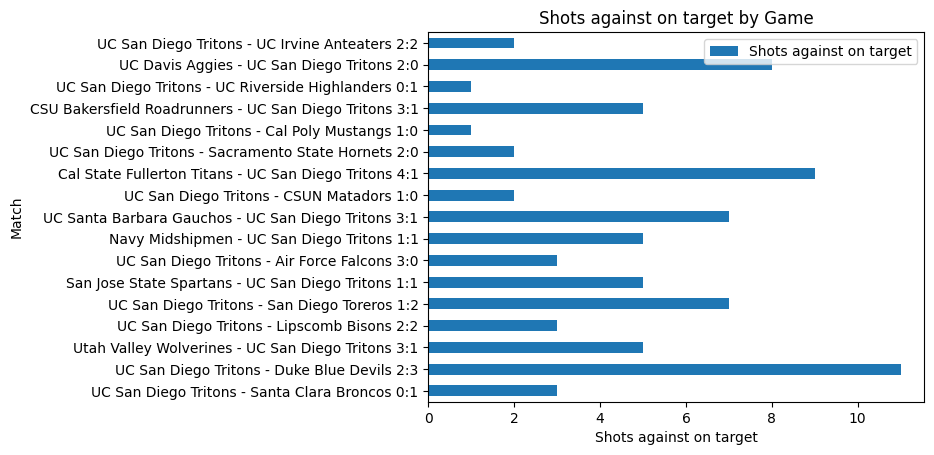

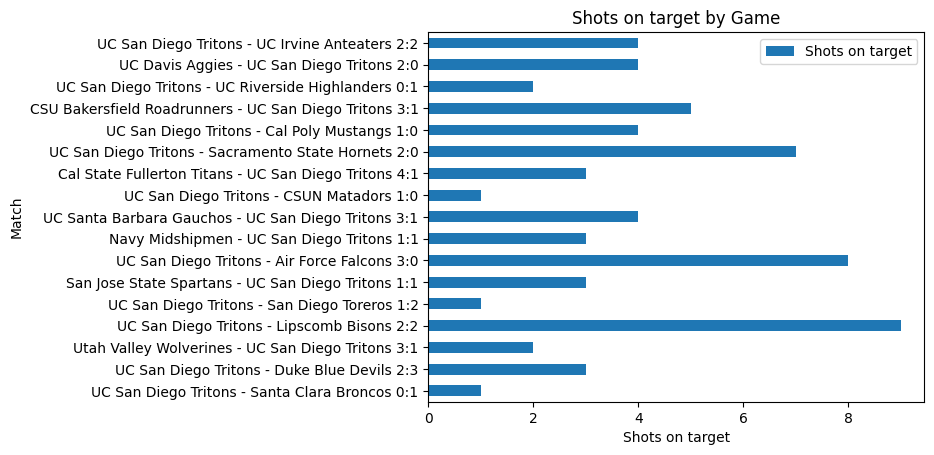

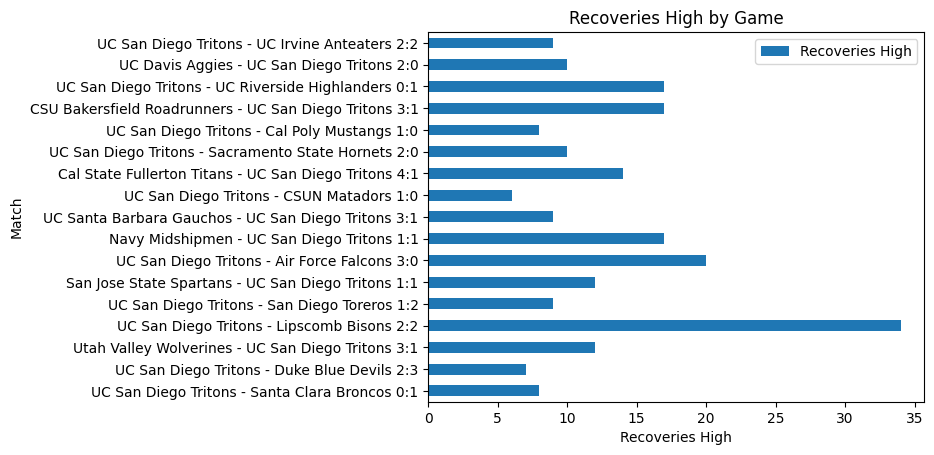

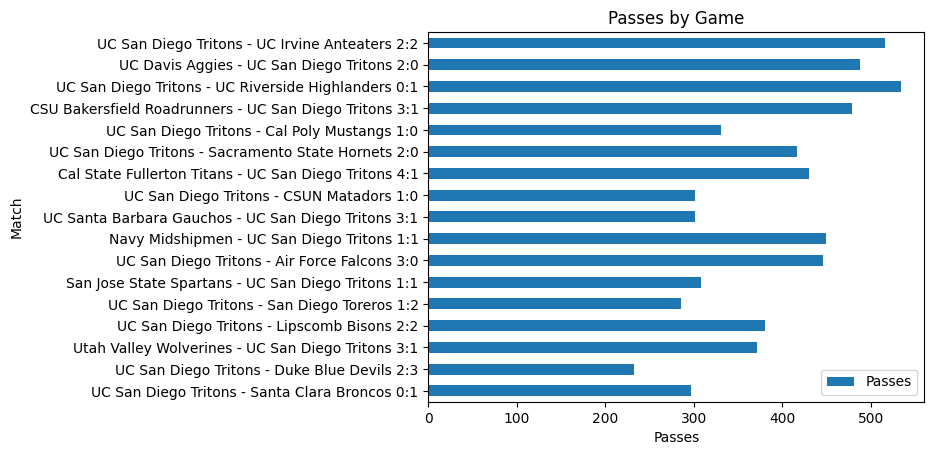

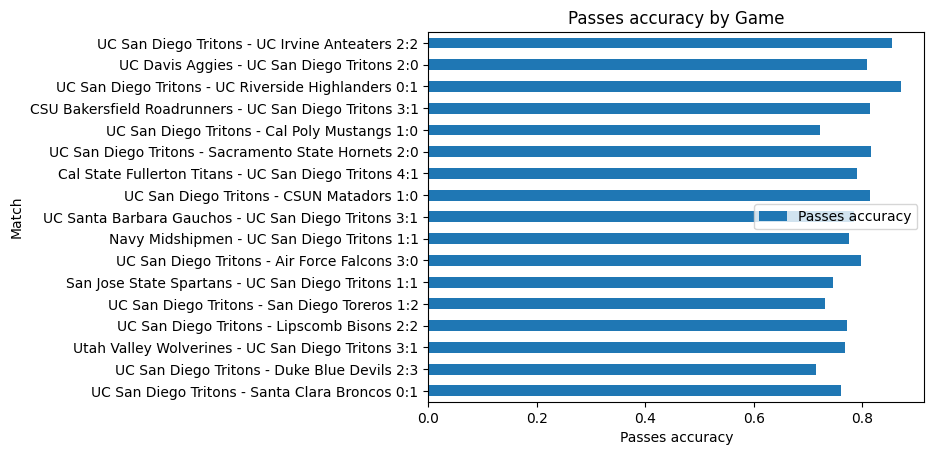

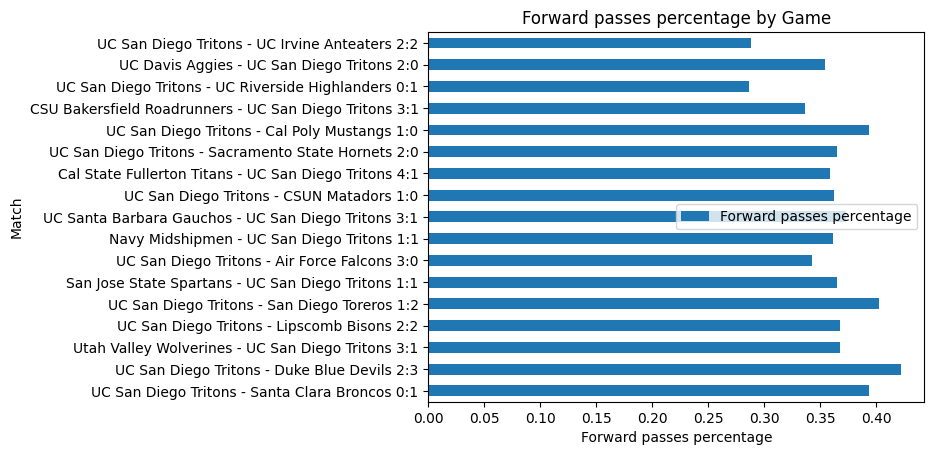

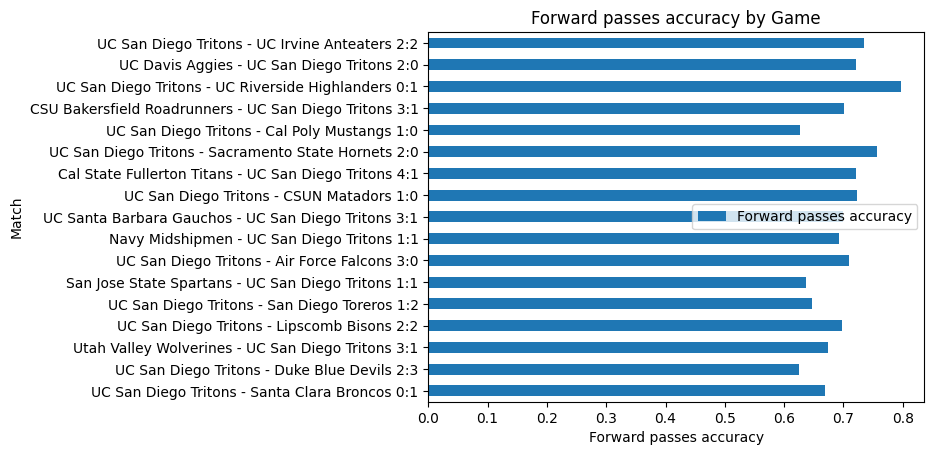

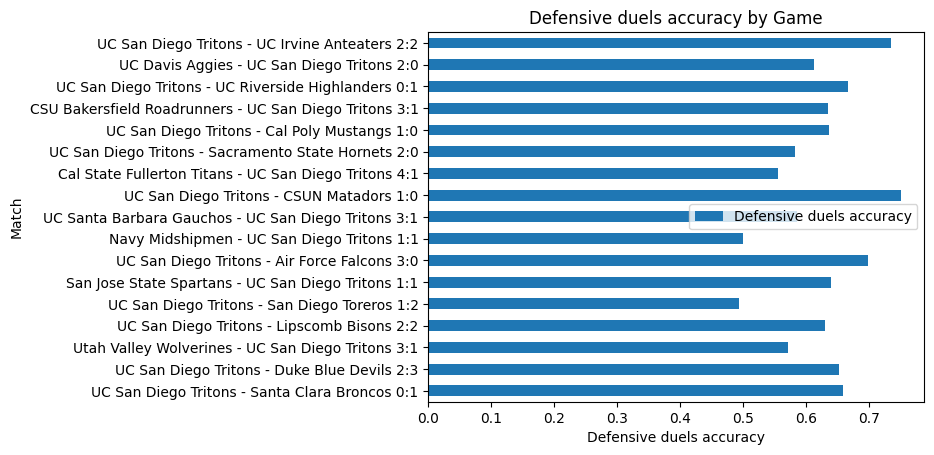

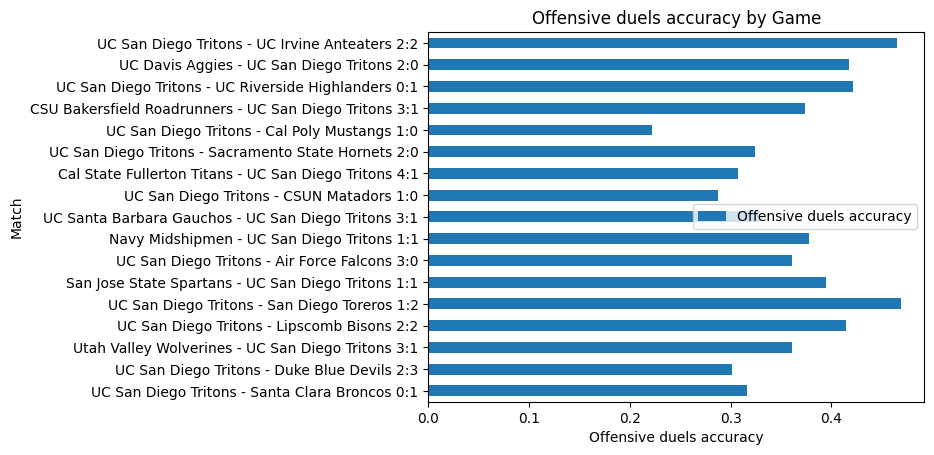

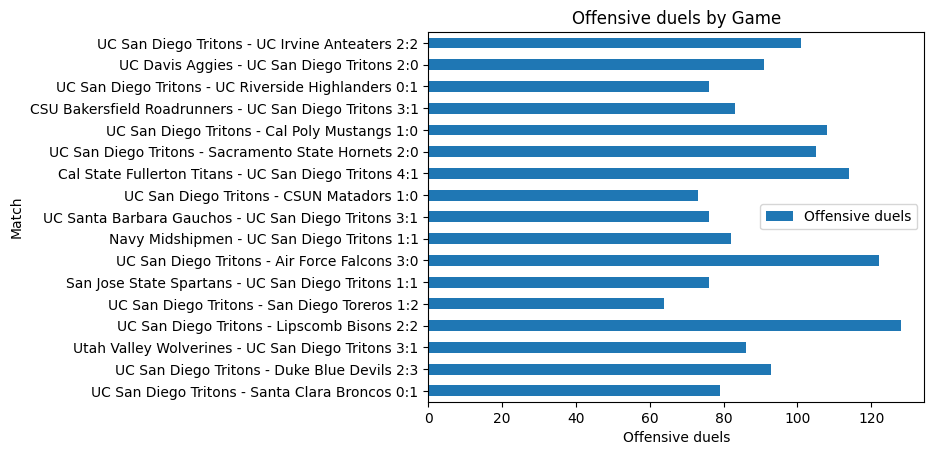

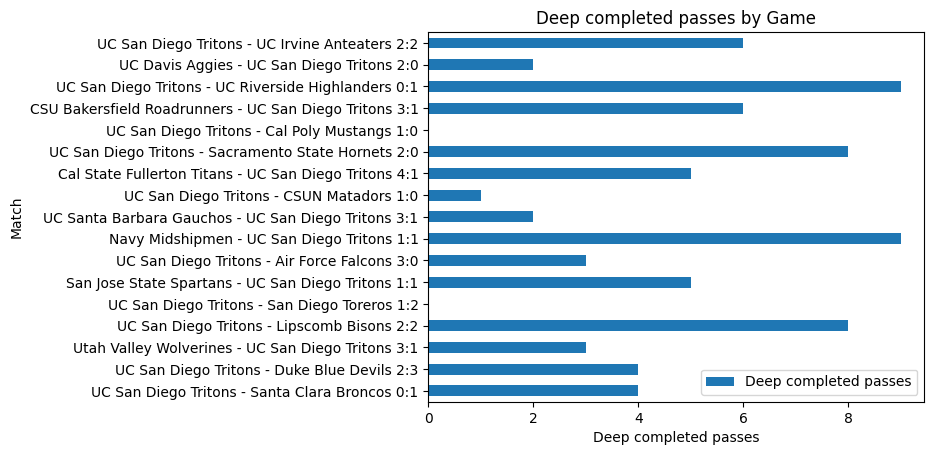

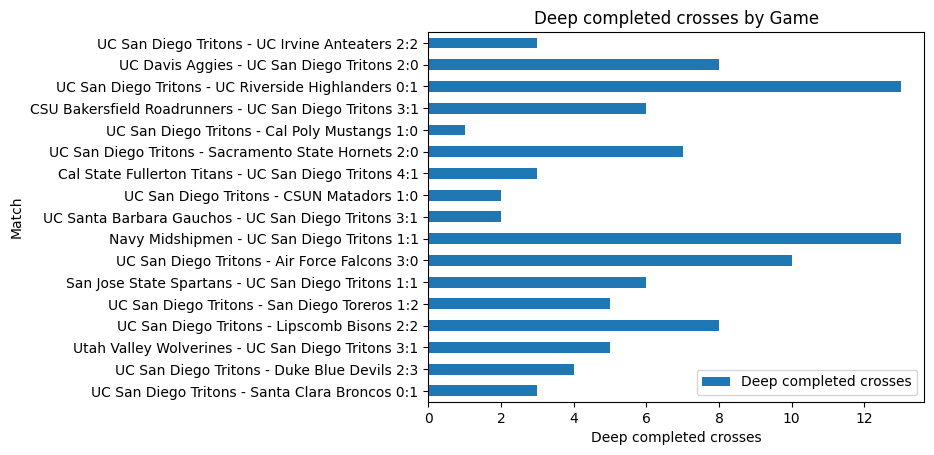

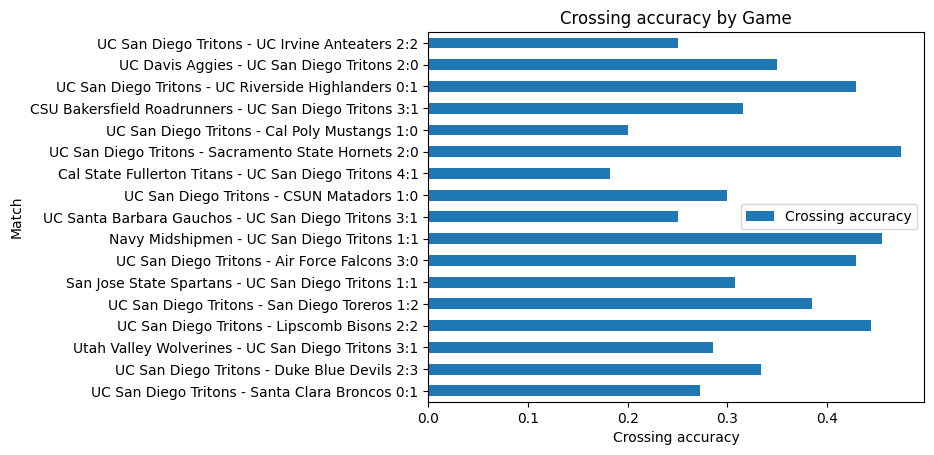

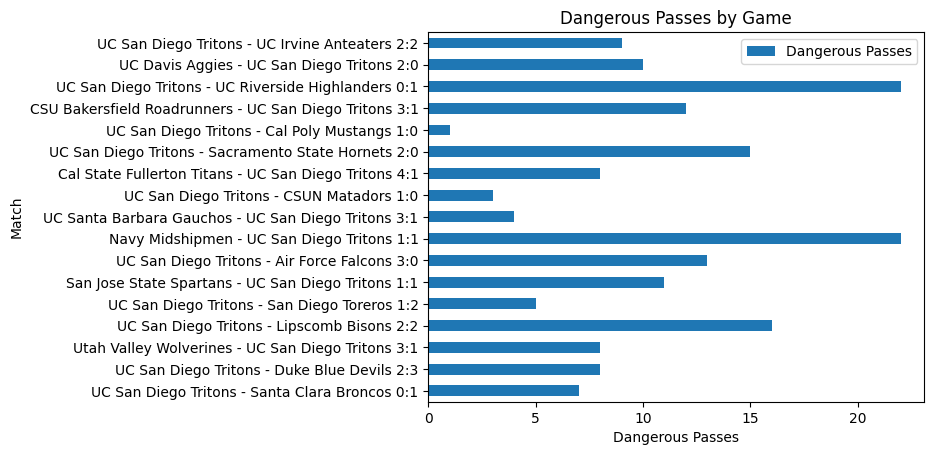

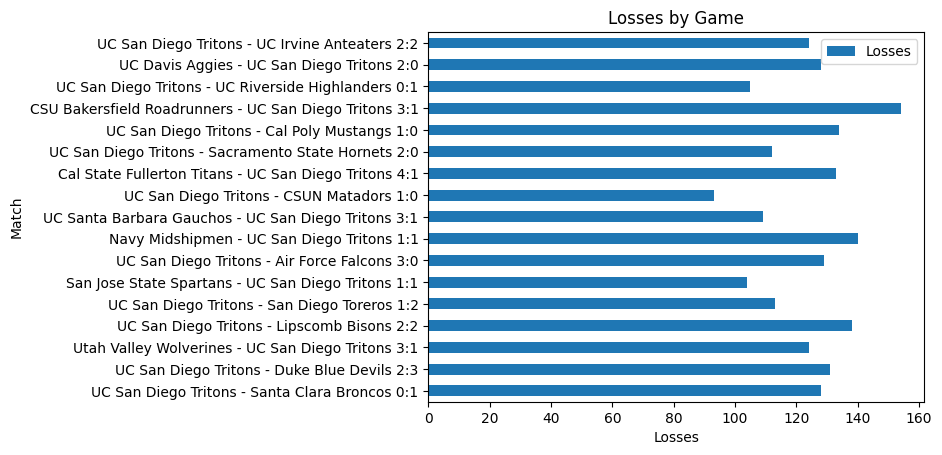

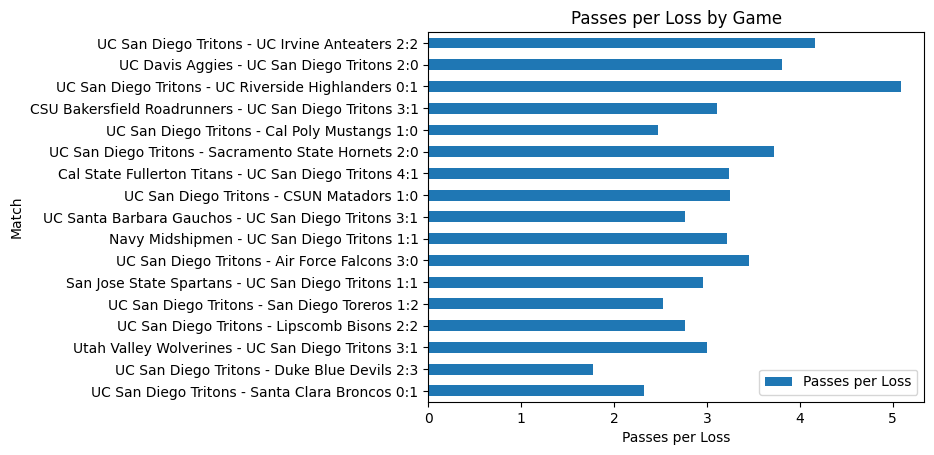

In [26]:
ucsdGames = gameData[gameData.get("Team")=="UC San Diego Tritons"]
for stat in stats_[2:]:
    ucsdGames.get(["Match",stat]).plot(kind = "barh",x="Match")
    plt.title(stat+" by Game")
    plt.xlabel(stat)

In [27]:
allSeasonStats.loc["UC San Diego Tritons",["Forward passes accuracy","Shots","Goals","Conceded goals","Offensive duels accuracy","Defensive duels accuracy","Deep completed passes","Crossing accuracy","Recoveries","Throw in percentage"]].to_numpy()

array([ 0.69942857,  9.70588235,  1.17647059,  1.64705882,  0.35902376,
        0.626498  ,  4.41176471,  0.359375  , 89.41176471,  0.87878788])